# Análisis de Churn de Clientes en TelecomX

## Introducción

Este notebook presenta un análisis exploratorio y de limpieza de datos para comprender los factores que influyen en el abandono de clientes (Churn) en la empresa de telecomunicaciones TelecomX. El objetivo principal es identificar patrones y características de los clientes que deciden dejar la empresa, con el fin de desarrollar estrategias de retención más efectivas.

A través de este análisis, se abordarán las siguientes etapas:

1.  **Extracción de Datos:** Carga del dataset de clientes.
2.  **Transformación de Datos:** Limpieza, manejo de valores ausentes/duplicados/inconsistencias, y creación de nuevas variables.
3.  **Análisis Descriptivo y Visualización:** Exploración de la distribución de las variables y relaciones entre ellas, con un enfoque en la variable Churn.
4.  **Identificación de Segmentos Clave:** Análisis de grupos de clientes con alta propensión al Churn.
5.  **Preparación para Modelado:** Conclusiones sobre la necesidad de técnicas más avanzadas (Machine Learning) para predecir el Churn.

Este trabajo sienta las bases para futuros análisis predictivos y la implementación de modelos que permitan anticipar el comportamiento de los clientes y reducir la tasa de abandono.

# METADATOS

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente


#📌 Extracción

In [ ]:
url=('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json(url)

In [ ]:
df.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
columnas=list(df.columns)
print(columnas)

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [ ]:
print("--- DataFrame original (primeras filas y tipos de datos) ---")
print("\nTipos de datos originales:")
print(df.dtypes)
print("\nColumnas del DataFrame original:")
print(df.columns)

--- DataFrame original (primeras filas y tipos de datos) ---

Tipos de datos originales:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Columnas del DataFrame original:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [ ]:
# --- 1. Desanidado de la columna 'customer' ---
print("\nPrimera entrada de 'customer':", df['customer'].iloc[0])
df_customer = pd.json_normalize(df['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns] # Renombrar para evitar conflictos
df_customer.head(1)


Primera entrada de 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}


,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,Female,0,Yes,Yes,9


In [ ]:
# --- 2. Desaninado de la columna 'phone' ---
print("\nPrimera entrada de 'phone':", df['phone'].iloc[0])
df_phone = pd.json_normalize(df['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns] # Renombrar para evitar conflictos
df_phone.head(2)



Primera entrada de 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}


,phone_PhoneService,phone_MultipleLines
0,Yes,No
1,Yes,Yes


In [ ]:
# --- 3. Desanidado de la columna 'internet' ---
print("\nPrimera entrada de 'internet':", df['internet'].iloc[0])
df_internet = pd.json_normalize(df['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns] # Renombrar para evitar conflictos
df_internet.head(2)


Primera entrada de 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}


,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes


In [ ]:
# --- 4. Desanidado de la columna 'account' ---
df_account = pd.json_normalize(df['account'])
df_account.columns = ['account_' + col for col in df_account.columns] # Renombrar para evitar conflictos
df_account.head(2)

,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# REUNIR TODA LA INFORMACIÓN EN UN SOLO DATAFRAME
# 1. Seleccionar las columnas originales no anidadas
df_base = df[['customerID', 'Churn']].copy()
df_base.head(2)

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No


In [ ]:
#2. Concatenar horizontalmente (axis=1) todos los DataFrames
df_final = pd.concat([
    df_base.reset_index(drop=True),# Aseguramos que los índices coincidan con reset_index(drop=True) para mayor robustez,
    df_customer.reset_index(drop=True),# aunque si todos tienen el mismo número de filas y no han sido reordenados, no sería estrictamente necesario, pero es buena práctica.
    df_phone.reset_index(drop=True),
    df_internet.reset_index(drop=True),
    df_account.reset_index(drop=True)
], axis=1)

# --- Paso 3: Verificar el DataFrame final ---
print("\n--- Columnas del DataFrame final unificado ---")
print(df_final.columns.tolist())

print(f"\n--- Dimensiones del DataFrame final: {df_final.shape} ---")


--- Columnas del DataFrame final unificado ---
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']

--- Dimensiones del DataFrame final: (7267, 21) ---


In [ ]:
df_final.head(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [ ]:
# RENOMBRANDO LAS COLUMNAS 'account_Charges.Monthly' y 'account_Charges.Total'

columnas_a_renombrar = {
    'account_Charges.Monthly': 'account_Charges_Monthly',  # Reemplazar punto por guion bajo
    'account_Charges.Total': 'account_Charges_Total'
}

df_final = df_final.rename(columns=columnas_a_renombrar)
print(df_final.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


#🔧 Transformación

#**LIMPIEZA DE DATOS:**
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

#**VALORES NULOS**

In [ ]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Aparentemente no hay valores nulos, vamos a verificar con:

- .isnull().sum()


In [ ]:
print("Conteo de valores nulos por columna")
print(df_final.isnull().sum())

Conteo de valores nulos por columna
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


Luego de este análisis, se concluye que no hay valores nulos


#**FILAS DUPLICADAS**

In [ ]:
antes = len(df_final)
df= df_final.drop_duplicates()
despues = len(df_final)
eliminado = antes - despues
print("Filas Antes:",antes)
print("Filas despues:", despues)
print("Filas eliminadas", eliminado)

Filas Antes: 7267
Filas despues: 7267
Filas eliminadas 0


In [ ]:
print(df_final['customerID'].duplicated().sum())

0


Se concluye que no hay filas de clientes duplicados.

#**VALORES VACIOS O EN BLANCO**

In [ ]:
# Detección de valores vacíos o en blanco
df_final.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [ ]:
# Se detectaron valores Churn en blanco '', no se sabe si permanencen en la empresa
# o van a dar de baja el servicio. Dado que son aproximademente un 3% de los datos, se procederá
# a extraerlos a otro # DataFrame llamado churn_blancos y  se quedarán almacenados en esta variable
# en caso que luego de los análisis adquirieran alguna relevancia

In [ ]:
# Contar cuántos espacios en blanco hay (para verificar)
num_espacios_blanco = (df_final['Churn'] == '').sum()
print(f"Número de registros con espacios en blanco en 'Churn': {num_espacios_blanco}")

# Listar los registros donde 'Churn' es un espacio en blanco
churn_blancos = df_final[df_final['Churn'] == '']
print("\nPrimeros 5 registros con espacios en blanco en 'Churn':")
display(churn_blancos.iloc[:, :4].head())
print(f"\nDimensiones de los registros con espacios en blanco: {churn_blancos.shape}")

Número de registros con espacios en blanco en 'Churn': 224

Primeros 5 registros con espacios en blanco en 'Churn':


,customerID,Churn,customer_gender,customer_SeniorCitizen
30,0047-ZHDTW,,Female,0
75,0120-YZLQA,,Male,0
96,0154-QYHJU,,Male,0
98,0162-RZGMZ,,Female,1
175,0274-VVQOQ,,Male,1



Dimensiones de los registros con espacios en blanco: (224, 21)


In [ ]:
# Respecto de los 11 registros en blanco de la columna account_Charges_Total (ACT)
# se quedarán almacenados en la variable ACT_blancos en caso que luego de los análisis
# adquirieran alguna relevancia.

espacios_blanco_ACT = (df_final['account_Charges_Total'].astype(str).str.strip() == '').sum()
print(f"Número de registros con espacios en blanco en 'account_Charges_Total': {espacios_blanco_ACT}")

# Almacenar los registros en el Df ACT_blancos
ACT_blancos = df_final[df_final['account_Charges_Total'].astype(str).str.strip() == '']
print("\nPrimeros 5 registros con espacios en blanco en 'account_Charges_Total':")
display(ACT_blancos.iloc[:, :4].head())
print(f"\nDimensiones de los registros con espacios en blanco: {ACT_blancos.shape}")


Número de registros con espacios en blanco en 'account_Charges_Total': 11

Primeros 5 registros con espacios en blanco en 'account_Charges_Total':


,customerID,Churn,customer_gender,customer_SeniorCitizen
975,1371-DWPAZ,No,Female,0
1775,2520-SGTTA,No,Female,0
1955,2775-SEFEE,No,Male,0
2075,2923-ARZLG,No,Male,0
2232,3115-CZMZD,No,Male,0



Dimensiones de los registros con espacios en blanco: (11, 21)


Quedan dos dataframes de datos, que podrían ser de utilidad en los análisis ulteriores:
  - churn_blancos
  - ACT_blancos (account_Charges_Total)

In [ ]:
# # Exportar df_churn_blancos a CSV
# churn_blancos.to_csv('churn_blancos.csv', index=False)

# # Exportar df_ACT_blancos a CSV
# ACT_blancos.to_csv('ACT_blancos.csv', index=False)

# print("Los DataFrames churn_blancos y ACT_blancos han sido exportados como 'churn_blancos.csv' y 'ACT_blancos.csv'")

Los DataFrames churn_blancos y ACT_blancos han sido exportados como 'churn_blancos.csv' y 'ACT_blancos.csv'


In [ ]:
# # Borrado del Data Frame df_final de los churn y ACT en 'blanco':
# print(f"Dimensiones del DataFrame antes de eliminar: {df_final.shape}")
# df_final = df_final[
#     (df_final['Churn'].astype(str).str.strip() != '') &
#     (df_final['account_Charges_Total'].astype(str).str.strip() != '')
# ].copy()
# print(f"Dimensiones del DataFrame después de eliminar: {df_final.shape}")

Dimensiones del DataFrame antes de eliminar: (7267, 21)
Dimensiones del DataFrame después de eliminar: (7032, 21)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [ ]:
df_final.sample(30)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
5058,6907-NZZIJ,Yes,Female,0,No,No,36,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.15,3615.6
3122,4353-HYOJD,No,Female,0,Yes,Yes,27,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,No,Mailed check,49.85,1336.15
5676,7758-UJWYS,No,Male,0,Yes,Yes,34,No,No phone service,DSL,...,No,No,Yes,Yes,No,Two year,Yes,Electronic check,40.55,1325.85
3715,5127-BZENZ,No,Female,0,Yes,Yes,56,Yes,Yes,DSL,...,No,No,No,Yes,No,One year,No,Bank transfer (automatic),65.20,3512.15
3654,5035-BVCXS,No,Male,0,No,No,11,Yes,No,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,75.90,866.4
2539,3544-FBCAS,No,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),83.60,5959.3
6374,8755-IWJHN,No,Male,1,Yes,No,69,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.35,6382
6736,9281-OFDMF,No,Male,1,No,No,39,Yes,Yes,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,90.70,3413.25
2014,2845-AFFTX,Yes,Male,1,Yes,No,41,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,4259.3
680,0967-BMLBD,No,Female,0,Yes,Yes,11,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.00,196.35


#**PRESENCIA OUTLIERS**

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [ ]:
columnas=list(df_final.columns)
columnas

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges_Monthly',
 'account_Charges_Total']

In [ ]:
# Revisión de los valores unicos, en variables categóricas.
columnas_revision=['Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod']
# Para ver los valores únicos de cada columna seleccionada:
for col in df_final[columnas_revision]:
    print(f"Valores únicos en '{col}': {df_final[col].unique()}")

Valores únicos en 'Churn': ['No' 'Yes' '']
Valores únicos en 'customer_gender': ['Female' 'Male']
Valores únicos en 'customer_SeniorCitizen': [0 1]
Valores únicos en 'customer_Partner': ['Yes' 'No']
Valores únicos en 'customer_Dependents': ['Yes' 'No']
Valores únicos en 'phone_PhoneService': ['Yes' 'No']
Valores únicos en 'phone_MultipleLines': ['No' 'Yes' 'No phone service']
Valores únicos en 'internet_InternetService': ['DSL' 'Fiber optic' 'No']
Valores únicos en 'internet_OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores únicos en 'internet_OnlineBackup': ['Yes' 'No' 'No internet service']
Valores únicos en 'internet_DeviceProtection': ['No' 'Yes' 'No internet service']
Valores únicos en 'internet_TechSupport': ['Yes' 'No' 'No internet service']
Valores únicos en 'internet_StreamingTV': ['Yes' 'No' 'No internet service']
Valores únicos en 'internet_StreamingMovies': ['No' 'Yes' 'No internet service']
Valores únicos en 'account_Contract': ['One year' 'Month-to-month' 'Two y

In [ ]:
# Revisión de los outliers en las columnas con datos nuemricos o cuantitativos
# Seleccionaremos sólo las columnas 'cuantitativas', en un nuevo dataset:
columnas_cuantitativas = list(set(columnas) - set(columnas_revision))
print(columnas_cuantitativas)
columnas_cuantitativas.remove('customerID') #
#columnas_cuantitativas = list(set(columnas_cuantitativas) - set(['customerID']))
print(columnas_cuantitativas)

['customer_tenure', 'account_Charges_Total', 'customerID', 'account_Charges_Monthly']
['customer_tenure', 'account_Charges_Total', 'account_Charges_Monthly']


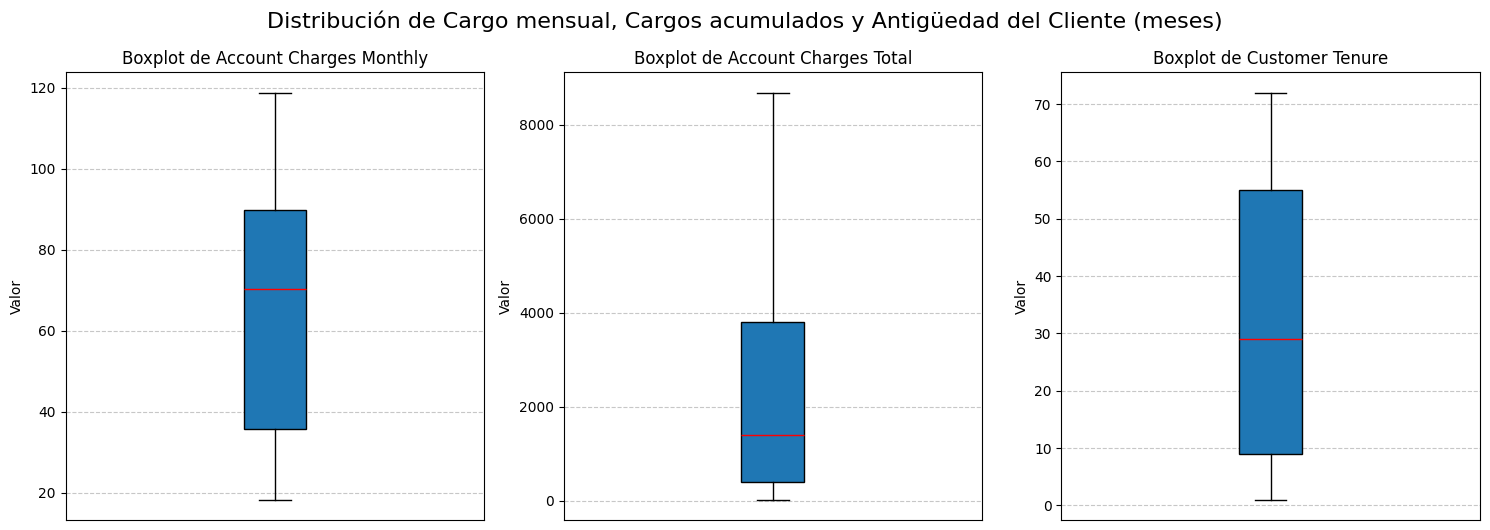

In [ ]:
# Se realiza un boxplot de cada columna numérica, para visualizar posibles outliers
import seaborn as sns
import matplotlib.pyplot as plt
#Convertir a numérico 'account_Charges_Total'
df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce')

columnas_boxplot = [
    'account_Charges_Monthly',
    'account_Charges_Total',
    'customer_tenure'
]
# Construcción del gráfico:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False)
axes = axes.flatten() # Esto asegura que axes es un array 1D que podemos iterar
# Iterar sobre cada columna y crear un boxplot en su propio subplot
for i, col in enumerate(columnas_boxplot):
    data_to_plot_single = df_final[col].dropna()# Indica sobre que columna se construirán los gráficos
    axes[i].boxplot(data_to_plot_single, patch_artist=True, medianprops={'color': 'red'})
    # Añadir título específico para cada subplot
    axes[i].set_title(f'Boxplot de {col.replace("_", " ").title()}', fontsize=12) # Título más legible
    axes[i].set_ylabel('Valor') # Etiqueta del eje Y
    axes[i].grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)# Opcional: Eliminar los ticks del eje X para que solo se vea la caja
plt.tight_layout()
fig.suptitle('Distribución de Cargo mensual, Cargos acumulados y Antigüedad del Cliente (meses)', fontsize=16, y=1.05) # y=1.05 lo sube un poco
plt.show()

En los boxplots, no se aprecian valores outliers

In [ ]:
# Vamos a probar el método IQ3, para account_Charges_Total, que muestra el boxplot más disperso.

Q1= df_final['account_Charges_Total'].quantile(0.25)
Q3= df_final['account_Charges_Total'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_final[(df_final["account_Charges_Total"] < limite_inferior) | (df_final["account_Charges_Total"] > limite_superior)] #  detecta los outliers
#valores_normales = df[(df['Valor'] >= limite_inferior) & (df['Valor'] <= limite_superior)] # Los elimina

#resultado
print("Datos Ordenados")
#print(valores_normales)
print(outliers)

Datos Ordenados
Empty DataFrame
Columns: [customerID, Churn, customer_gender, customer_SeniorCitizen, customer_Partner, customer_Dependents, customer_tenure, phone_PhoneService, phone_MultipleLines, internet_InternetService, internet_OnlineSecurity, internet_OnlineBackup, internet_DeviceProtection, internet_TechSupport, internet_StreamingTV, internet_StreamingMovies, account_Contract, account_PaperlessBilling, account_PaymentMethod, account_Charges_Monthly, account_Charges_Total]
Index: []

[0 rows x 21 columns]


No detecta valores fuera de rango, corroborando la información del boxplot

#**MANEJO DE INCONSISTENCIAS**

In [ ]:
# PhoneService: suscripción al servicio telefónico
# MultipleLines: suscripción a más de una línea telefónica
# InternetService: suscripción a un proveedor de internet
# OnlineSecurity: suscripción adicional de seguridad en línea
# OnlineBackup: suscripción adicional de respaldo en línea
# DeviceProtection: suscripción adicional de protección del dispositivo
# TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
# StreamingTV: suscripción de televisión por cable
# StreamingMovies: suscripción de streaming de películas
# Valores únicos en 'phone_PhoneService': ['Yes' 'No']
# Valores únicos en 'phone_MultipleLines': ['No' 'Yes' 'No phone service']
# Valores únicos en 'internet_InternetService': ['DSL' 'Fiber optic' 'No']
# Valores únicos en 'internet_OnlineSecurity': ['No' 'Yes' 'No internet service']
# Valores únicos en 'internet_OnlineBackup': ['Yes' 'No' 'No internet service']
# Valores únicos en 'internet_DeviceProtection': ['No' 'Yes' 'No internet service']
# Valores únicos en 'internet_TechSupport': ['Yes' 'No' 'No internet service']
# Valores únicos en 'internet_StreamingTV': ['Yes' 'No' 'No internet service']
# Valores únicos en 'internet_StreamingMovies': ['No' 'Yes' 'No internet service']

In [ ]:
#Identificación y Corrección de Inconsistencias
print("--- Inconsistencias en Servicios de Telefonía ---")
# Inconsistencia 1: phone_PhoneService = 'No' pero que si tiene phone_MultipleLines
# (No tiene contratado el servicio telefónico por si múltiples lineas de teléfono )
inconsistencia_telefono_1 = df_final[(df_final['phone_PhoneService'] == 'No') &
                                     (df_final['phone_MultipleLines'] != 'No phone service')]
print(f"Filas con 'PhoneService' = 'No', pero que tiene 'MultipleLines', es INCORRECTO: {len(inconsistencia_telefono_1)}")
if not inconsistencia_telefono_1.empty:
    print(inconsistencia_telefono_1[['customerID', 'phone_PhoneService', 'phone_MultipleLines']].head())
    # Corrección: Establecer 'phone_MultipleLines' a 'No phone service'
    df_final.loc[(df_final['phone_PhoneService'] == 'No') &
                 (df_final['phone_MultipleLines'] != 'No phone service'),
                 'phone_MultipleLines'] = 'No phone service'
    print(f"Corregidas {len(inconsistencia_telefono_1)} filas para 'phone_MultipleLines'.")

--- Inconsistencias en Servicios de Telefonía ---
Filas con 'PhoneService' = 'No', pero que tiene 'MultipleLines', es INCORRECTO: 0


In [ ]:
# Inconsistencia 2: phone_PhoneService = 'Yes' pero phone_MultipleLines es 'No phone service'
inconsistencia_telefono_2 = df_final[(df_final['phone_PhoneService'] == 'Yes') &
                                     (df_final['phone_MultipleLines'] == 'No phone service')]
print(f"\nFilas con 'PhoneService' = 'Yes' pero el 'MultipleLines' tiene 'No phone servicio, es INCORRECTO: {len(inconsistencia_telefono_2)}")



Filas con 'PhoneService' = 'Yes' pero el 'MultipleLines' tiene 'No phone servicio, es INCORRECTO: 0


In [ ]:
print("\n--- Inconsistencias en Servicios de Internet ---")

internet_services_adicionales = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Inconsistencia 3: internet_InternetService = 'No' pero un servicio adicional NO es 'No internet service'
for col in internet_services_adicionales:
    inconsistencia_internet_no_servicio = df_final[(df_final['internet_InternetService'] == 'No') &
                                                  (df_final[col] != 'No internet service')]
    if not inconsistencia_internet_no_servicio.empty:
        print(f"Filas con 'InternetService' = 'No' pero '{col}' es INCORRECTO: {len(inconsistencia_internet_no_servicio)}")
        print(inconsistencia_internet_no_servicio[['customerID', 'internet_InternetService', col]].head())
        # Corrección: Establecer el servicio adicional a 'No internet service'
        df_final.loc[(df_final['internet_InternetService'] == 'No') &
                     (df_final[col] != 'No internet service'),
                     col] = 'No internet service'
        print(f"Corregidas {len(inconsistencia_internet_no_servicio)} filas para '{col}'.")
    else:
        print(f"No se encontraron inconsistencias para '{col}' cuando 'InternetService' es 'No'.")



--- Inconsistencias en Servicios de Internet ---
No se encontraron inconsistencias para 'internet_OnlineSecurity' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_OnlineBackup' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_DeviceProtection' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_TechSupport' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_StreamingTV' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_StreamingMovies' cuando 'InternetService' es 'No'.


In [ ]:
# print("\n--- Inconsistencias en Servicios de Internet ---")

# Inconsistencia 4: internet_InternetService es 'DSL' o 'Fiber optic' pero un servicio adicional es 'No internet service'
# Esto implicaría que el cliente tiene internet pero el servicio adicional dice que no lo tiene.
# Esto es una inconsistencia, y la corrección más lógica sería cambiar 'No internet service' a 'No'
# (asumiendo que si no lo contrató, es un 'No', no un 'No internet service').

for col in internet_services_adicionales:
    inconsistencia_internet_con_servicio = df_final[(df_final['internet_InternetService'].isin(['DSL', 'Fiber optic'])) &
                                                    (df_final[col] == 'No internet service')]
    if not inconsistencia_internet_con_servicio.empty:
        print(f"\nFilas con 'InternetService' = 'DSL/Fiber' pero '{col}' es INCORRECTO: {len(inconsistencia_internet_con_servicio)}")
        print(inconsistencia_internet_con_servicio[['customerID', 'internet_InternetService', col]].head())
        # Corrección: Cambiar 'No internet service' a 'No'
        df_final.loc[(df_final['internet_InternetService'].isin(['DSL', 'Fiber optic'])) &
                     (df_final[col] == 'No internet service'),
                     col] = 'No'
        print(f"Corregidas {len(inconsistencia_internet_con_servicio)} filas para '{col}' (cambiado a 'No').")
    else:
        print(f"No se encontraron inconsistencias para '{col}' cuando 'InternetService' es 'DSL/Fiber'.")

print("\n--- Verificación final de valores únicos después de la corrección ---")
print("Valores únicos en 'phone_PhoneService':", df_final['phone_PhoneService'].unique())
print("Valores únicos en 'phone_MultipleLines':", df_final['phone_MultipleLines'].unique())
print("Valores únicos en 'internet_InternetService':", df_final['internet_InternetService'].unique())
for col in internet_services_adicionales:
    print(f"Valores únicos en '{col}':", df_final[col].unique())

print("\n--- Limpieza de inconsistencias completada ---")

No se encontraron inconsistencias para 'internet_OnlineSecurity' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_OnlineBackup' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_DeviceProtection' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_TechSupport' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_StreamingTV' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_StreamingMovies' cuando 'InternetService' es 'DSL/Fiber'.

--- Verificación final de valores únicos después de la corrección ---
Valores únicos en 'phone_PhoneService': ['Yes' 'No']
Valores únicos en 'phone_MultipleLines': ['No' 'Yes' 'No phone service']
Valores únicos en 'internet_InternetService': ['DSL' 'Fiber optic' 'No']
Valores únicos en 'internet_OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores únicos en '

Se concluye que no existen inconsistencia en los datos

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [ ]:
# Es necesario revisar que 'account_Charges_Monthly' sea numérico
print(df_final['account_Charges_Monthly'].dtype)

float64


In [ ]:
# Definir número de días de un mes
dias_mes = 30.0 # Para efectos prácticos se fijó que un mes consta de 30 días
# Observación: la columna no tiene valores Nan
df_final['Cuentas_Diarias'] = df_final['account_Charges_Monthly'] / dias_mes
# Verificar que la la nueva columna haya sido creada
print("DataFrame con la nueva columna 'Cuentas_Diarias'")
print(df_final[['customerID', 'account_Charges_Monthly', 'Cuentas_Diarias']].head())


DataFrame con la nueva columna 'Cuentas_Diarias'
   customerID  account_Charges_Monthly  Cuentas_Diarias
0  0002-ORFBO                     65.6         2.186667
1  0003-MKNFE                     59.9         1.996667
2  0004-TLHLJ                     73.9         2.463333
3  0011-IGKFF                     98.0         3.266667
4  0013-EXCHZ                     83.9         2.796667


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

#📊 Carga y análisis

Análisis Descriptivo:
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [ ]:
# Determinar parámetros estadísticos generales para las columnas numericas:
# 'account_Charges_Total', 'account_Charges_Monthly', 'customer_tenure' y 'Cuentas_Diarias'
estadisticos = df_final[['customer_tenure','account_Charges_Monthly','account_Charges_Total','Cuentas_Diarias']].describe()
print('Parámetros estadísticos generales para las columnas númericas :\n',estadisticos)

Parámetros estadísticos generales para las columnas númericas :
        customer_tenure  account_Charges_Monthly  account_Charges_Total  \
count      7032.000000              7032.000000            7032.000000   
mean         32.421786                64.798208            2283.300441   
std          24.545260                30.085974            2266.771362   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.587500             401.450000   
50%          29.000000                70.350000            1397.475000   
75%          55.000000                89.862500            3794.737500   
max          72.000000               118.750000            8684.800000   

       Cuentas_Diarias  
count      7032.000000  
mean          2.159940  
std           1.002866  
min           0.608333  
25%           1.186250  
50%           2.345000  
75%           2.995417  
max           3.958333  


In [ ]:
print(df_final.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias'],
      dtype='object')


Analisis de Frecuencias y Proporciones:
el primer paso es entender cuántas veces aparece cada categoría y qué porcentaje representa del total. Esto  dará una visión general de la composición de los clientes.

In [ ]:
columnas_cuantitativas = ['Churn','customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
                       'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
                       'internet_InternetService', 'internet_OnlineSecurity',
                       'internet_OnlineBackup', 'internet_DeviceProtection',
                       'internet_TechSupport', 'internet_StreamingTV',
                       'internet_StreamingMovies', 'account_Contract',
                       'account_PaperlessBilling', 'account_PaymentMethod']

for col in columnas_cuantitativas:
    print(f"--- Columna: {col} ---")
    print(df_final[col].value_counts().sum())
    print(df_final[col].value_counts())
    print(df_final[col].value_counts(normalize=True) * 100) # Proporciones en porcentaje
    print("\n")

--- Columna: Churn ---
7032
Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


--- Columna: customer_gender ---
7032
customer_gender
Male      3549
Female    3483
Name: count, dtype: int64
customer_gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64


--- Columna: customer_SeniorCitizen ---
7032
customer_SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
customer_SeniorCitizen
0    83.759954
1    16.240046
Name: proportion, dtype: float64


--- Columna: customer_Partner ---
7032
customer_Partner
No     3639
Yes    3393
Name: count, dtype: int64
customer_Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64


--- Columna: customer_Dependents ---
7032
customer_Dependents
No     4933
Yes    2099
Name: count, dtype: int64
customer_Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64


--- Columna: phone_PhoneService ---
7032
phon

In [ ]:
# Análisis churn, en crudo por costo mensual
# plt churn yes/ costo mensual --- Churn no/costo mensual
# ver posible relación entre el tipo de churn o/y costo mensual, mediante
# un boxplot.

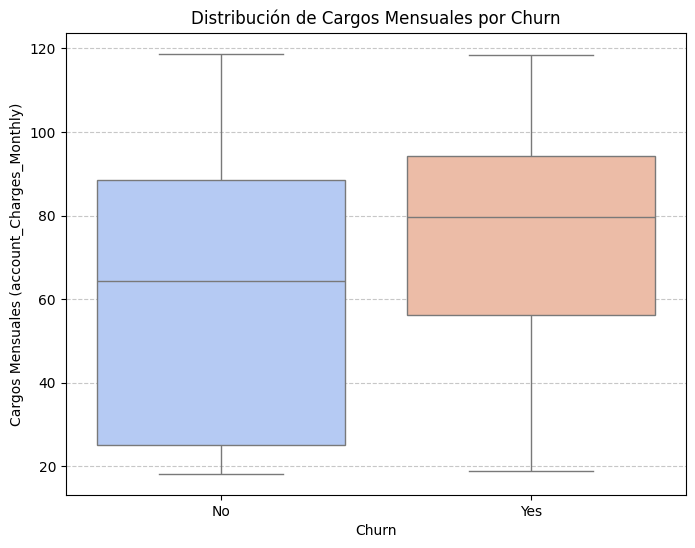

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df_final, palette='coolwarm', hue='Churn', legend=False)
plt.title('Distribución de Cargos Mensuales por Churn')
plt.xlabel('Churn')
plt.ylabel('Cargos Mensuales (account_Charges_Monthly)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

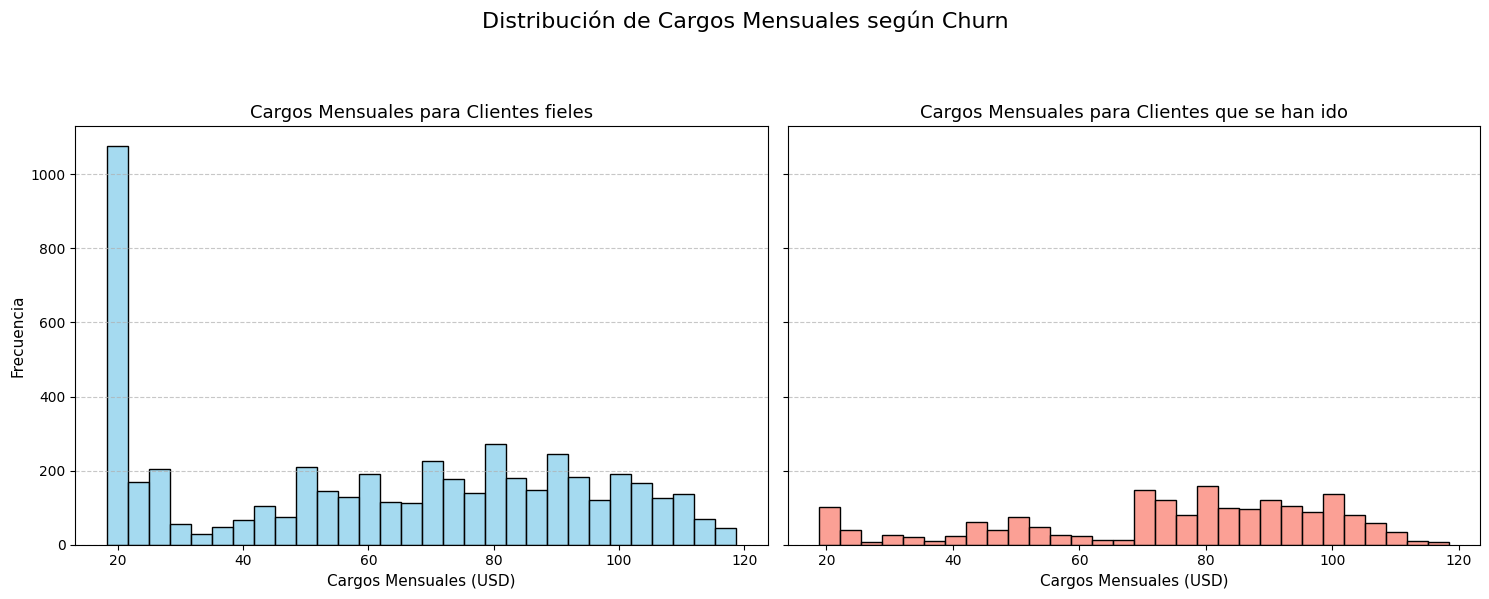

In [ ]:
# Gráfico de distribuciones mensuales según Churn
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True) # sharey=True asegura que ambos tengan la misma escala en el eje Y

# Gráfico para Churn = 'No' (Clientes que NO se fueron)
sns.histplot(data=df_final[df_final['Churn'] == 'No'], # Filtra solo los clientes con Churn 'No'
             x='account_Charges_Monthly',
             bins=30, # Puedes ajustar los bins
             #kde=True,
             color='Skyblue', # Color para este histograma (invertido)
             ax=axes[0]) # Asigna el gráfico al primer subplot (índice 0)
axes[0].set_title('Cargos Mensuales para Clientes fieles', fontsize=13)
axes[0].set_xlabel('Cargos Mensuales (USD)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


# Gráfico para Churn = 'Yes' (Clientes que SÍ se fueron)
sns.histplot(data=df_final[df_final['Churn'] == 'Yes'], # Filtra solo los clientes con Churn 'Yes'
             x='account_Charges_Monthly',
             bins=30, # Mismos bins para consistencia en la comparación
             #kde=True,
             color='salmon', # Color para este histograma (invertido)
             ax=axes[1]) # Asigna el gráfico al segundo subplot (índice 1)
axes[1].set_title('Cargos Mensuales para Clientes que se han ido', fontsize=13)
axes[1].set_xlabel('Cargos Mensuales (USD)', fontsize=11)
axes[1].set_ylabel('') # Deja el ylabel vacío si sharey=True para evitar redundancia
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.suptitle('Distribución de Cargos Mensuales según Churn', fontsize=16, y=1.02) # Título general para toda la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el layout para que no se solapen y deje espacio para el supertítulo
plt.show()

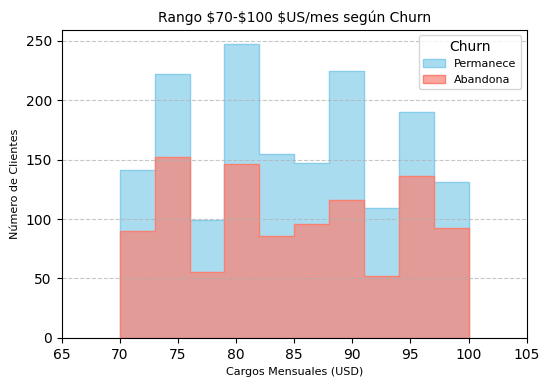

In [ ]:
# Filtrado del  DATAFRAME para el segmento de interés: cargos mensuales entre 70 y 100 USD
df_segmento = df_final[(df_final['account_Charges_Monthly'] >= 70) & (df_final['account_Charges_Monthly'] <= 100)].copy()

plt.figure(figsize=(6, 4)) # Para el tamaño de la figura

# Histograma con KDE superpuesto para los datos filtrados
sns.histplot(data=df_segmento, # DataFrame filtrado aquí
             x='account_Charges_Monthly',
             hue='Churn',
             bins=10, # Ajuste de bins
             #kde=True, # Mantiene la curva de densidad suavizada
             stat="count", # MUESTRA EL CONTEO EN EL EJE Y
             palette={'No': 'skyblue', 'Yes': 'salmon'},
             alpha=0.7,
             element="step" # Opcional: dibuja el histograma como pasos
            )

# Título y etiquetas a los ejes
plt.title('Rango $70-$100 $US/mes según Churn', fontsize=10)
plt.xlabel('Cargos Mensuales (USD)', fontsize=8)
plt.ylabel('Número de Clientes', fontsize=8) # Etiqueta del eje Y ajustada

# Ajusta los límites del eje X para enfocar solo el rango de interés
plt.xlim(65, 105)

plt.grid(axis='y', linestyle='--', alpha=0.7) # Para añadir una cuadrícula
plt.legend(title='Churn', labels=['Permanece', 'Abandona'], fontsize=8)
plt.show()

In [ ]:
# Filtra el df_final para crear df_rango que es con el que se continuará trabajando
df_rango = df_final[(df_final['account_Charges_Monthly'] >= 70) & (df_final['account_Charges_Monthly'] <= 100)].copy()

print(f"Dimensiones del DataFrame original (df_final): {df_final.shape}")
print(f"Dimensiones del DataFrame filtrado (df_rango): {df_rango.shape}")


Dimensiones del DataFrame original (df_final): (7032, 22)
Dimensiones del DataFrame filtrado (df_rango): (2687, 22)



--- Porcentajes Globales de Churn en el Rango $70-$100 ---
Churn
No     62.002233
Yes    37.997767
Name: proportion, dtype: float64


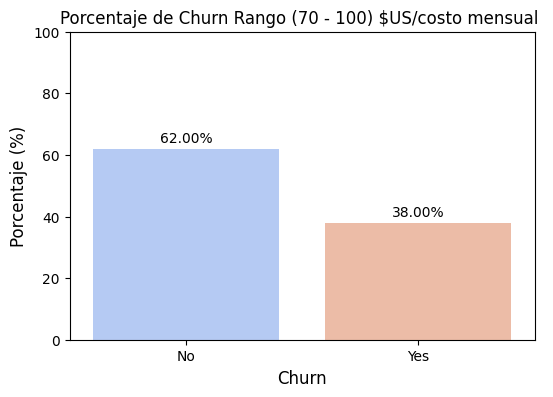

In [ ]:
# Calcular porcentajes globales de Churn en df_rango
churn_percentages_rango = df_rango['Churn'].value_counts(normalize=True) * 100

print("\n--- Porcentajes Globales de Churn en el Rango $70-$100 ---")
print(churn_percentages_rango)

#Visualización de estos porcentajes

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_percentages_rango.index, y=churn_percentages_rango.values, palette='coolwarm', hue=churn_percentages_rango.index, legend=False)
plt.title('Porcentaje de Churn Rango (70 - 100) $US/costo mensual ', fontsize=12)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.ylim(0, 100) # Eje y entre  y 100
for index, value in enumerate(churn_percentages_rango.values):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center') # Etiquetas de porcentaje
plt.show()

# Aprox., el 38% de este rango da de baja el servicio

Osea el 38 % de los clientes de este rango, se dan de baja, lo que indica que aqui hay un problema

In [ ]:
# CLIENTES NO CHURN/PARA TODO EL DF

# Filtro del DataFrame para obtener solo los clientes que NO hicieron churn
df_no_churn = df_final[df_final['Churn'] == 'No'].copy()

print(f"Total de clientes con Churn = 'No': {len(df_no_churn)}")

# --- Calcular los conteos ---

# Clientes con SOLO servicio de teléfono
# Tienen phone_PhoneService = 'Yes' e internet_InternetService = 'No'
count_only_phone = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'Yes') &
    (df_no_churn['internet_InternetService'] == 'No')
].shape[0]
print(f"\nClientes Churn='No' con SOLO servicio de teléfono: {count_only_phone}")

# Clientes con SOLO servicio de internet
# Tienen phone_PhoneService = 'No' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_only_internet = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'No') &
    (df_no_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='No' con SOLO servicio de internet: {count_only_internet}")


# 3. Clientes con servicio de teléfono e internet
# Tienen phone_PhoneService = 'Yes' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_phone_and_internet = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'Yes') &
    (df_no_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='No' con servicio de teléfono e internet: {count_phone_and_internet}")

# Verificación opcional: la suma de las categorías debería ser igual al total de clientes sin Churn
# Ojo: esto asume que cada cliente cae en una de estas tres categorías o no tiene ningún servicio.
# Si hay clientes sin ningún servicio, o con PhoneService='No' y InternetService='No', no serán contados aquí.
total_counted = count_only_phone + count_only_internet + count_phone_and_internet
print(f"\nSuma de clientes contados: {total_counted}")
print(f"Diferencia con el total de No Churn: {len(df_no_churn) - total_counted}")

Total de clientes con Churn = 'No': 5163

Clientes Churn='No' con SOLO servicio de teléfono: 1407
Clientes Churn='No' con SOLO servicio de internet: 510
Clientes Churn='No' con servicio de teléfono e internet: 3246

Suma de clientes contados: 5163
Diferencia con el total de No Churn: 0


In [ ]:
# CLIENTES NO CHURN - RANGO (70-100)$US
# Filtrar para obtener el rango:

# Filtrado del DataFrame para obtener solo los clientes que NO hicieron churn
df_rango = df_final[(df_final['account_Charges_Monthly'] >= 70) & (df_final['account_Charges_Monthly'] <= 100)].copy()

df_no_churn = df_rango[df_rango['Churn'] == 'No'].copy()

print(f"Total de clientes con Churn = 'No': {len(df_no_churn)}")

# --- Calcular los conteos ---

# Clientes con SOLO servicio de teléfono
# Tienen phone_PhoneService = 'Yes' e internet_InternetService = 'No'
count_only_phone = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'Yes') &
    (df_no_churn['internet_InternetService'] == 'No')
].shape[0]
print(f"\nClientes Churn='No' con SOLO servicio de teléfono: {count_only_phone}")

# Clientes con SOLO servicio de internet
# Tienen phone_PhoneService = 'No' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_only_internet = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'No') &
    (df_no_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='No' con SOLO servicio de internet: {count_only_internet}")


# 3. Clientes con servicio de teléfono e internet
# Tienen phone_PhoneService = 'Yes' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_phone_and_internet = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'Yes') &
    (df_no_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='No' con servicio de teléfono e internet: {count_phone_and_internet}")

# Verificación opcional: la suma de las categorías debería ser igual al total de clientes sin Churn
# Ojo: esto asume que cada cliente cae en una de estas tres categorías o no tiene ningún servicio.
# Si hay clientes sin ningún servicio, o con PhoneService='No' y InternetService='No', no serán contados aquí
print ('Servicios contratados de los clientes fieles')
total_counted = count_only_phone + count_only_internet + count_phone_and_internet
print(f"\nSuma de clientes contados: {total_counted}")
print(f"Diferencia con el total de No Churn: {len(df_no_churn) - total_counted}")

Total de clientes con Churn = 'No': 1666

Clientes Churn='No' con SOLO servicio de teléfono: 0
Clientes Churn='No' con SOLO servicio de internet: 0
Clientes Churn='No' con servicio de teléfono e internet: 1666
Servicios contratados de los clientes fieles

Suma de clientes contados: 1666
Diferencia con el total de No Churn: 0


In [ ]:
# CLIENTES YES CHURN/PARA TODO EL DF

# Filtrado del DataFrame para obtener solo los clientes que SI hicieron churn
# osea se dieron de baja de los servicios contratados
df_yes_churn = df_final[df_final['Churn'] == 'Yes'].copy()

print(f"Total de clientes con Churn = 'Yes': {len(df_yes_churn)}")

# --- Calcular los conteos ---

# Clientes con SOLO servicio de teléfono
# Tienen phone_PhoneService = 'Yes' e internet_InternetService = 'No'
count_only_phone = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'Yes') &
    (df_yes_churn['internet_InternetService'] == 'No')
].shape[0]
print(f"\nClientes Churn='Yes' con SOLO servicio de teléfono: {count_only_phone}")

# Clientes con SOLO servicio de internet
# Tienen phone_PhoneService = 'No' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_solo_internet = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'No') &
    (df_yes_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='Yes' con SOLO servicio de internet: {count_solo_internet}")


# 3. Clientes con servicio de teléfono e internet
# Tienen phone_PhoneService = 'Yes' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_phone_e_internet = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'Yes') &
    (df_yes_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='Yes' con servicio de teléfono e internet: {count_phone_e_internet}")

# Verificación opcional: la suma de las categorías debería ser igual al total de clientes sin Churn
# Ojo: esto asume que cada cliente cae en una de estas tres categorías o no tiene ningún servicio.
# Si hay clientes sin ningún servicio, o con PhoneService='No' y InternetService='No', no serán contados aquí.
total_counted = count_only_phone + count_solo_internet + count_phone_e_internet
print(f"\nSuma de clientes contados: {total_counted}")
print(f"Diferencia con el total de Yes Churn: {len(df_yes_churn) - total_counted}")

Total de clientes con Churn = 'Yes': 1869

Clientes Churn='Yes' con SOLO servicio de teléfono: 113
Clientes Churn='Yes' con SOLO servicio de internet: 170
Clientes Churn='Yes' con servicio de teléfono e internet: 1586

Suma de clientes contados: 1869
Diferencia con el total de Yes Churn: 0


In [ ]:
# CLIENTES Yes CHURN - RANGO (70-100)$US
# Filtrar para obtener el rango:
# Filtrar el DataFrame para filtrar los clientes del rango (70-100)$US
df_rango = df_final[(df_final['account_Charges_Monthly'] >= 70) & (df_final['account_Charges_Monthly'] <= 100)].copy()

df_yes_churn = df_rango[df_rango['Churn'] == 'Yes'].copy()

print(f"Total de clientes con Churn = Yes: {len(df_yes_churn)}")

# --- Calcular los conteos ---

# Clientes con SOLO servicio de teléfono
# Tienen phone_PhoneService = 'Yes' e internet_InternetService = 'No'
count_only_phone = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'Yes') &
    (df_yes_churn['internet_InternetService'] == 'No')
].shape[0]
print(f"\nClientes Churn='Yes' con SOLO servicio de teléfono: {count_only_phone}")

# Clientes con SOLO servicio de internet
# Tienen phone_PhoneService = 'No' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_only_internet = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'No') &
    (df_yes_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='Yes' con SOLO servicio de internet: {count_only_internet}")


# 3. Clientes con servicio de teléfono e internet
# Tienen phone_PhoneService = 'Yes' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_phone_and_internet = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'Yes') &
    (df_yes_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='Yes' con servicio de teléfono e internet: {count_phone_and_internet}")

# Verificación opcional: la suma de las categorías debería ser igual al total de clientes sin Churn
# Ojo: esto asume que cada cliente cae en una de estas tres categorías o no tiene ningún servicio.
# Si hay clientes sin ningún servicio, o con PhoneService='No' y InternetService='No', no serán contados aquí
print ('Servicios contratados de los clientes con Churn (Rango 70-100 $US)')
total_counted = count_only_phone + count_only_internet + count_phone_and_internet
print(f"\nSuma de clientes contados: {total_counted}")
print(f"Diferencia con el total de Yes Churn: {len(df_yes_churn) - total_counted}")

Total de clientes con Churn = Yes: 1021

Clientes Churn='Yes' con SOLO servicio de teléfono: 0
Clientes Churn='Yes' con SOLO servicio de internet: 0
Clientes Churn='Yes' con servicio de teléfono e internet: 1021
Servicios contratados de los clientes con Churn (Rango 70-100 $US)

Suma de clientes contados: 1021
Diferencia con el total de Yes Churn: 0


Total de clientes fieles en el segmento $70-$100: 1666
De ellos, clientes fieles con servicio telefónico: 1666

--- Conteo de Servicio Multilínea (Clientes Fieles con Teléfono) ---
phone_MultipleLines
Yes    981
No     685
Name: count, dtype: int64

--- Porcentaje de Servicio Multilínea (Clientes Fieles con Teléfono) ---
phone_MultipleLines
Yes    58.883553
No     41.116447
Name: proportion, dtype: float64


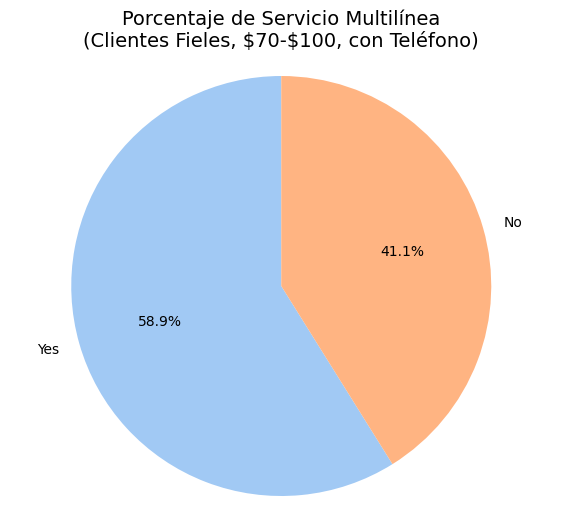

In [ ]:
# Clientes fieles
df_no_churn_segmento = df_final[
    (df_final['Churn'] == 'No') &
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

print(f"Total de clientes fieles en el segmento $70-$100: {len(df_no_churn_segmento)}")

# Paso 2: Filtrar a los clientes que tienen servicio telefónico ('phone_PhoneService' == 'Yes')
clientes_con_telefono_fieles = df_no_churn_segmento[
    df_no_churn_segmento['phone_PhoneService'] == 'Yes'
].copy()

print(f"De ellos, clientes fieles con servicio telefónico: {len(clientes_con_telefono_fieles)}")

# Paso 3: Calcular el conteo y porcentaje de 'phone_MultipleLines' para este grupo
if not clientes_con_telefono_fieles.empty:
    # Conteo de clientes con y sin servicio multilínea
    conteo_multilinea = clientes_con_telefono_fieles['phone_MultipleLines'].value_counts()

    # Porcentaje de clientes con y sin servicio multilínea
    porcentaje_multilinea = clientes_con_telefono_fieles['phone_MultipleLines'].value_counts(normalize=True) * 100

    print("\n--- Conteo de Servicio Multilínea (Clientes Fieles con Teléfono) ---")
    print(conteo_multilinea)

    print("\n--- Porcentaje de Servicio Multilínea (Clientes Fieles con Teléfono) ---")
    print(porcentaje_multilinea)

    # Opcional: Visualización con un gráfico de torta o de barras

    plt.figure(figsize=(7, 6))
    plt.pie(porcentaje_multilinea, labels=porcentaje_multilinea.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Porcentaje de Servicio Multilínea\n(Clientes Fieles, \$70-\$100, con Teléfono)', fontsize=14)
    plt.axis('equal') # Asegura que el gráfico de torta sea circular
    plt.show()

else:
    print("\nNo hay clientes fieles con servicio telefónico en el rango de $70-$100 para analizar.")


Total de clientes salientes en el segmento $70-$100: 1666
De ellos, clientes salientes del servicio telefónico: 1666

--- Conteo de Servicio Multilínea (Clientes salientes con Teléfono) ---
phone_MultipleLines
Yes    564
No     457
Name: count, dtype: int64

--- Porcentaje de Servicio Multilínea (Clientes salientes con Teléfono) ---
phone_MultipleLines
Yes    55.239961
No     44.760039
Name: proportion, dtype: float64


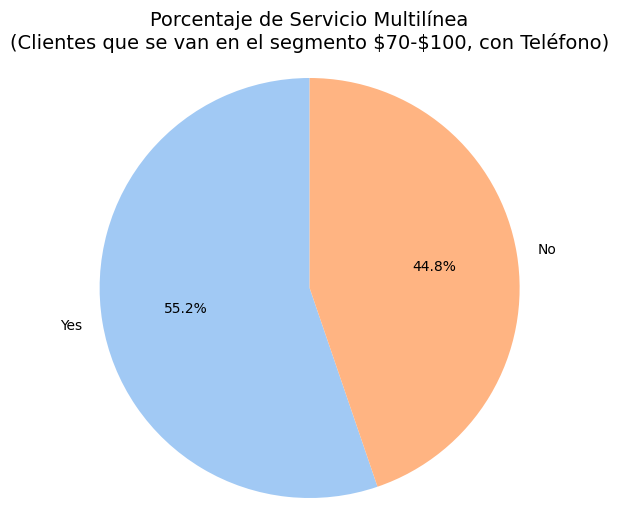

In [ ]:
# Análisis Multilinea telefonica para los clientes que se van en el segmento 70-100
df_yes_churn_segmento = df_final[
    (df_final['Churn'] == 'Yes') &
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

print(f"Total de clientes salientes en el segmento $70-$100: {len(df_no_churn_segmento)}")

# Paso 2: Filtrar a los clientes que tienen servicio telefónico ('phone_PhoneService' == 'Yes')
yes_church = df_yes_churn_segmento[
    df_yes_churn_segmento['phone_PhoneService'] == 'Yes'
].copy()

print(f"De ellos, clientes salientes del servicio telefónico: {len(clientes_con_telefono_fieles)}")

# Paso 3: Calcular el conteo y porcentaje de 'phone_MultipleLines' para este grupo
if not yes_church.empty:
    # Conteo de clientes con y sin servicio multilínea
    conteo_multilinea1 = yes_church['phone_MultipleLines'].value_counts()

    # Porcentaje de clientes con y sin servicio multilínea
    porcentaje_multilinea2 = yes_church['phone_MultipleLines'].value_counts(normalize=True) * 100

    print("\n--- Conteo de Servicio Multilínea (Clientes salientes con Teléfono) ---")
    print(conteo_multilinea1)

    print("\n--- Porcentaje de Servicio Multilínea (Clientes salientes con Teléfono) ---")
    print(porcentaje_multilinea2)

    # Opcional: Visualización con un gráfico de torta o de barras
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(7, 6))
    plt.pie(porcentaje_multilinea2, labels=porcentaje_multilinea.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Porcentaje de Servicio Multilínea\n(Clientes que se van en el segmento \$70-\$100, con Teléfono)', fontsize=14)
    plt.axis('equal') # Asegura que el gráfico de torta sea circular
    plt.show()

else:
    print("\nNo hay clientes fieles con servicio telefónico en el rango de $70-$100 para analizar.")


Se concluye que en cuanto al servicio de multilineas de teléfonos no hay diferencias significativas, en cuanto al grupo de clientes fieles y los que abandonan el servicio, en el segmento de costo de 70 a 100 US


--- Conteo de Tipos de Servicio de Internet (Clientes Fieles, $70-$100) ---
internet_InternetService
Fiber optic    1109
DSL             559
Name: count, dtype: int64

--- Porcentaje de Tipos de Servicio de Internet (Clientes Fieles, $70-$100) ---
internet_InternetService
Fiber optic    66.486811
DSL            33.513189
Name: count, dtype: float64


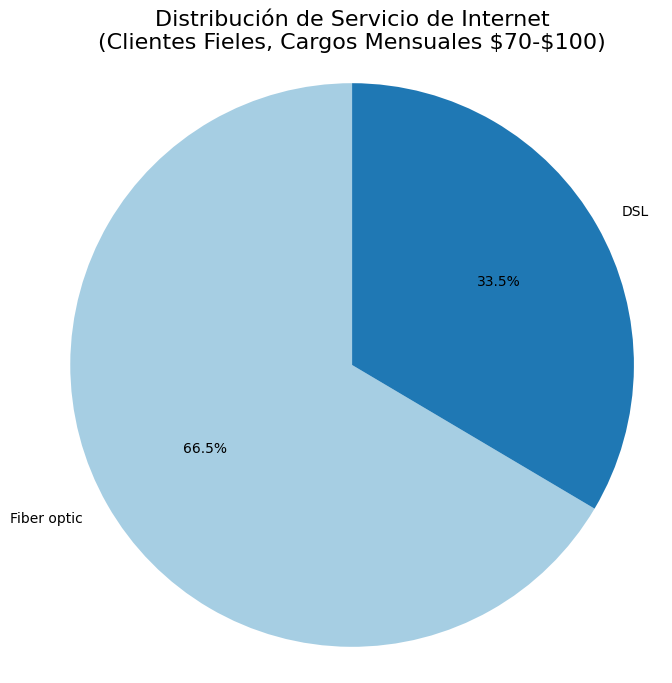

In [ ]:
# ANALISIS DEL SERVICIO DE INTERNET
# Este comprende los servicios:
# 'internet_InternetService': a su vez con las categorías: 'Fiber optic' y 'DSL'
# Este DataFrame contiene clientes con Churn='No' Y MonthlyCharges entre 70 y 100 USD.
df_no_churn_segmento = df_final[
    (df_final['Churn'] == 'No') &
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

# 1. Calcular las proporciones de las categorías de internet_InternetService
# Solo nos interesan 'Fiber optic' y 'DSL' en este contexto, así que filtraremos.
internet_service_counts = df_no_churn_segmento['internet_InternetService'].value_counts()

# Asegurarse de que solo consideramos 'Fiber optic' y 'DSL'
# Si hay otras categorías como 'No', deberíamos excluirlas si el objetivo es solo 'Fiber optic' y 'DSL'.
internet_service_proportions = internet_service_counts[
    internet_service_counts.index.isin(['Fiber optic', 'DSL'])
]

# Calcular los porcentajes
internet_service_percentages = internet_service_proportions / internet_service_proportions.sum() * 100

print("\n--- Conteo de Tipos de Servicio de Internet (Clientes Fieles, $70-$100) ---")
print(internet_service_proportions)
print("\n--- Porcentaje de Tipos de Servicio de Internet (Clientes Fieles, $70-$100) ---")
print(internet_service_percentages)

# 2. Generar el gráfico de torta
if not internet_service_percentages.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(internet_service_percentages,
            labels=internet_service_percentages.index,
            autopct='%1.1f%%', # Formato para mostrar los porcentajes en las porciones
            startangle=90,     # Inicia la primera porción en la parte superior
            colors=sns.color_palette('Paired')) # Una paleta de colores amigable

    plt.title('Distribución de Servicio de Internet\n(Clientes Fieles, Cargos Mensuales \$70-\$100)', fontsize=16)
    plt.axis('equal') # Asegura que el gráfico de torta sea circular
    plt.show()
else:
    print("\nNo hay datos para 'Fiber optic' o 'DSL' en el segmento de clientes fieles y el rango de $70-$100.")


--- Porcentaje de Tipos de Servicio de Internet (Clientes No Churn, $70-$100) ---
internet_InternetService
Fiber optic    66.486811
DSL            33.513189
Name: count, dtype: float64

--- Porcentaje de Tipos de Servicio de Internet (Clientes Con Churn, $70-$100) ---
internet_InternetService
Fiber optic    95.984329
DSL             4.015671
Name: count, dtype: float64


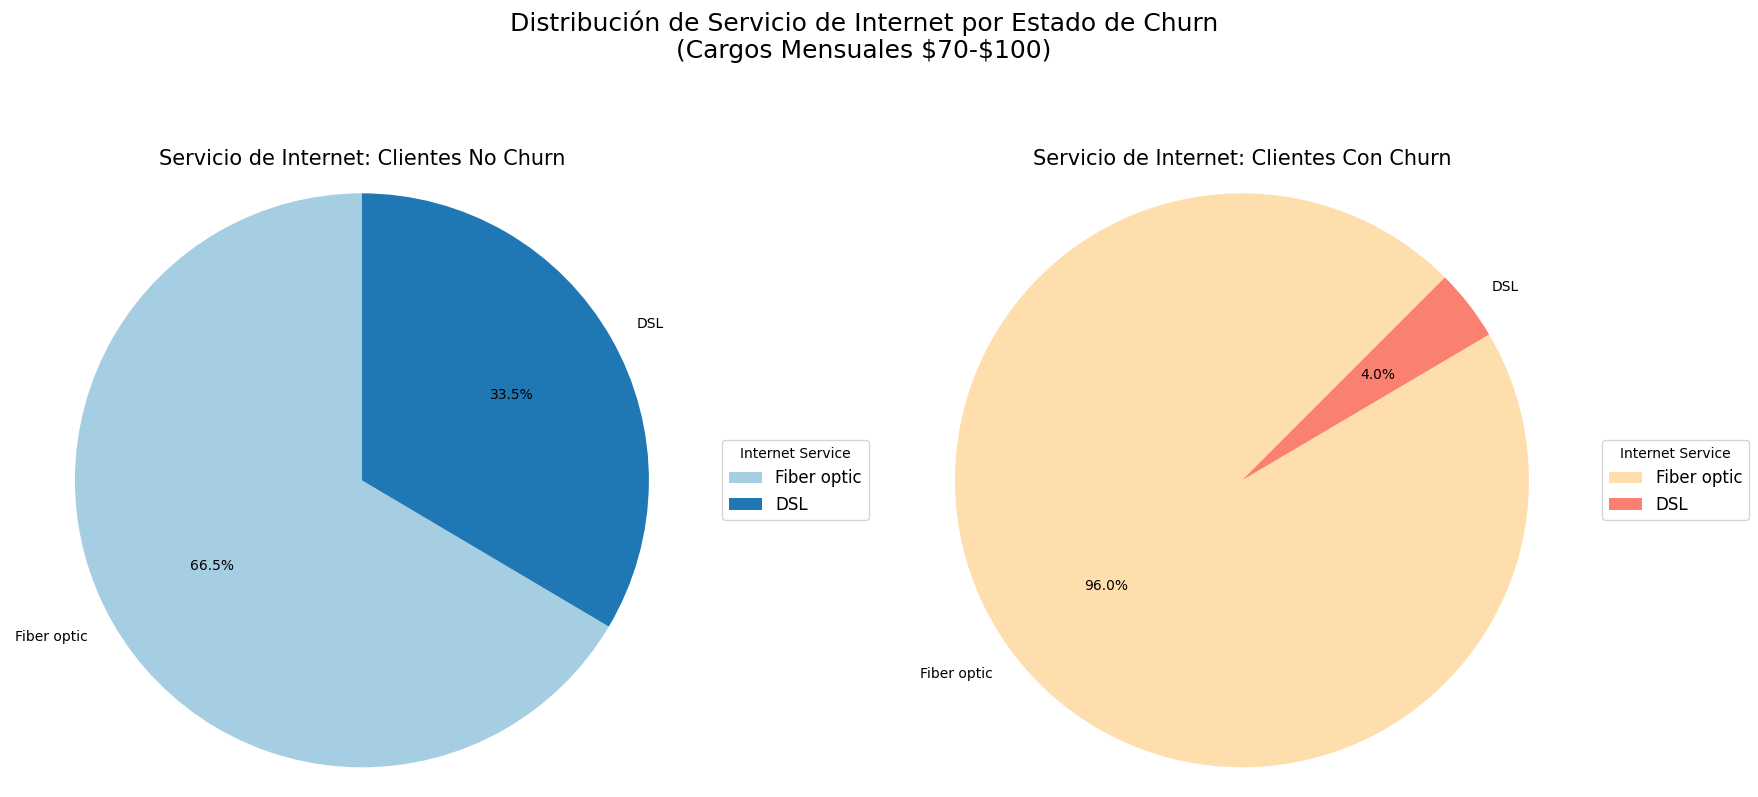

In [ ]:
# Filtrado del DataFrame para el rango de interés ($70-$100)
df_segmento = df_final[
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

# Filtrar para Churn = 'No'
df_no_churn_segmento = df_segmento[df_segmento['Churn'] == 'No'].copy()

# Filtrar para Churn = 'Yes'
df_yes_churn_segmento = df_segmento[df_segmento['Churn'] == 'Yes'].copy()


# --- Calcular las proporciones para Churn = 'No' ---
internet_counts_no = df_no_churn_segmento['internet_InternetService'].value_counts()
# Solo nos interesan 'Fiber optic' y 'DSL', y manejar el caso donde 'No' servicio de internet también exista
internet_proportions_no = internet_counts_no[internet_counts_no.index.isin(['Fiber optic', 'DSL'])]

# Calcular porcentajes, asegurando que la suma sea solo para DSL y Fiber Optic
if not internet_proportions_no.empty and internet_proportions_no.sum() > 0:
    internet_percentages_no = (internet_proportions_no / internet_proportions_no.sum()) * 100
else:
    internet_percentages_no = pd.Series(dtype=float) # Manejar el caso de no datos


# --- Calcular las proporciones para Churn = 'Yes' ---
internet_counts_yes = df_yes_churn_segmento['internet_InternetService'].value_counts()
# Solo nos interesan 'Fiber optic' y 'DSL'
internet_proportions_yes = internet_counts_yes[internet_counts_yes.index.isin(['Fiber optic', 'DSL'])]

# Calcular porcentajes, asegurando que la suma sea solo para DSL y Fiber Optic
if not internet_proportions_yes.empty and internet_proportions_yes.sum() > 0:
    internet_percentages_yes = (internet_proportions_yes / internet_proportions_yes.sum()) * 100
else:
    internet_percentages_yes = pd.Series(dtype=float) # Manejar el caso de no datos


print("\n--- Porcentaje de Tipos de Servicio de Internet (Clientes No Churn, $70-$100) ---")
print(internet_percentages_no)
print("\n--- Porcentaje de Tipos de Servicio de Internet (Clientes Con Churn, $70-$100) ---")
print(internet_percentages_yes)


# --- Generar los gráficos de torta en una sola visualización ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # 1 fila, 2 columnas para los dos gráficos

# Gráfico de torta para Churn = 'No'
if not internet_percentages_no.empty:
    wedges0, texts0, autotexts0 = axes[0].pie(internet_percentages_no,
                labels=internet_percentages_no.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=sns.color_palette('Paired')) # Una paleta de colores amigable

    axes[0].set_title('Servicio de Internet: Clientes No Churn', fontsize=15)
    axes[0].axis('equal') # Asegura que el gráfico sea circular

    # Aumentar tamaño de fuente de la leyenda
    axes[0].legend(wedges0, internet_percentages_no.index,
                   title="Internet Service",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1),
                   fontsize=12) # Ajusta el tamaño de la fuente aquí

else:
    axes[0].text(0.5, 0.5, 'No hay datos para mostrar', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=12)
    axes[0].set_title('Servicio de Internet: Clientes No Churn', fontsize=15)
    axes[0].axis('off')


# Gráfico de torta para Churn = 'Yes'
if not internet_percentages_yes.empty:
    wedges1, texts1, autotexts1 = axes[1].pie(internet_percentages_yes,
                labels=internet_percentages_yes.index,
                autopct='%1.1f%%',
                startangle=45,
                colors=['NavajoWhite', 'salmon']) # Colores personalizados

    axes[1].set_title('Servicio de Internet: Clientes Con Churn', fontsize=15)
    axes[1].axis('equal') # Asegura que el gráfico sea circular

    # Aumentar tamaño de fuente de la leyenda
    axes[1].legend(wedges1, internet_percentages_yes.index,
                   title="Internet Service",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1),
                   fontsize=12) # Ajusta el tamaño de la fuente aquí


else:
    axes[1].text(0.5, 0.5, 'No hay datos para mostrar', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Servicio de Internet: Clientes Con Churn', fontsize=15)
    axes[1].axis('off')


plt.suptitle('Distribución de Servicio de Internet por Estado de Churn\n(Cargos Mensuales \$70-\$100)', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

En este punto claramente hay un problema, que explica que la baja del 96% de los servicios contratados de Internet, en este tramo (10-100 US de los planes) y pudieran estar relacionados con la calidad del servicio de Fibra Optica, en los tramos más costosos de los esquemas de cargos, donde los clientes suelen pagar precios más elevados por una mejor calidad del servicio

In [ ]:
# --- 1. Cantidad total de clientes Churn='Yes' en el df_final ---
total_churn_yes_df_final = df_final[df_final['Churn'] == 'Yes'].shape[0]
print(f"1. Cantidad total de clientes con Churn='Yes' en el DataFrame completo (df_final): {total_churn_yes_df_final}")

# --- 2. Cantidad total de clientes Churn='Yes' en el tramo de costo mensual $70-$100 ---
# Primero, filtramos el DataFrame para este rango de costos mensuales.
df_70_100 = df_final[
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

# Luego, contamos los que tienen Churn='Yes' en este segmento.
total_churn_yes_70_100 = df_70_100[df_70_100['Churn'] == 'Yes'].shape[0]
print(f"2. Cantidad total de clientes con Churn='Yes' en el tramo $70-$100: {total_churn_yes_70_100}")

# --- 3. Cantidad total de clientes Churn='Yes' con 'Fiber Optic' en el tramo $70-$100 ---
# Partimos del DataFrame ya filtrado por el tramo de costo mensual (df_70_100).
# Luego, añadimos el filtro para 'internet_InternetService' == 'Fiber optic' y 'Churn' == 'Yes'.
total_churn_yes_fiber_70_100 = df_70_100[
    (df_70_100['Churn'] == 'Yes') &
    (df_70_100['internet_InternetService'] == 'Fiber optic')
].shape[0]
print(f"3. Cantidad total de clientes con Churn='Yes' y 'Fiber Optic' en el tramo $70-$100: {total_churn_yes_fiber_70_100}")
print(f"3. Proporción de clientes con Churn= 'Yes' y 'Fiber Optic' en el tramo $70-$100, \n con respecto al total de churn: {total_churn_yes_fiber_70_100/total_churn_yes_df_final*100:.2f}")
print(f"4. Proporción de clientes con Churn= 'Yes' y 'Fiber Optic' en el tramo $70-$100,\n con respecto al total de churn en el tramo $70-$100: {total_churn_yes_fiber_70_100/total_churn_yes_70_100*100:.2f}")

1. Cantidad total de clientes con Churn='Yes' en el DataFrame completo (df_final): 1869
2. Cantidad total de clientes con Churn='Yes' en el tramo $70-$100: 1021
3. Cantidad total de clientes con Churn='Yes' y 'Fiber Optic' en el tramo $70-$100: 980
3. Proporción de clientes con Churn= 'Yes' y 'Fiber Optic' en el tramo $70-$100, 
 con respecto al total de churn: 52.43
4. Proporción de clientes con Churn= 'Yes' y 'Fiber Optic' en el tramo $70-$100,
 con respecto al total de churn en el tramo $70-$100: 95.98


Se concluye que del total de clientes pérdidos por Telecom, la mitad (52,43%) corresponde a aquellos de las siguientes caracteristicas:
- Se encuentran en el tramo de costo del plan de entre '($70-$100)' US$/mes.
- El 96% de clientes de este tramo contrataban especificamente el plan de Internet de Fibra óptica.

Con este hallazgo se explica el 52,43 % de pérdidas de clientes.

Total de clientes Churn='Yes' en el tramo $70-$100: 1021

--- Conteo de Servicios de Internet Adicionales para Clientes con Churn ('Yes') en el Rango $70-$100 ---

internet_OnlineSecurity:
{'No': 895, 'Yes': 126}

internet_OnlineBackup:
{'No': 759, 'Yes': 262}

internet_DeviceProtection:
{'No': 761, 'Yes': 260}

internet_TechSupport:
{'No': 893, 'Yes': 128}

internet_StreamingTV:
{'No': 551, 'Yes': 470}

internet_StreamingMovies:
{'No': 553, 'Yes': 468}

--- Resumen Consolidado de Conteos ---
                                 No  Yes
Servicio de Internet Adicional          
internet_OnlineSecurity         895  126
internet_OnlineBackup           759  262
internet_DeviceProtection       761  260
internet_TechSupport            893  128
internet_StreamingTV            551  470
internet_StreamingMovies        553  468


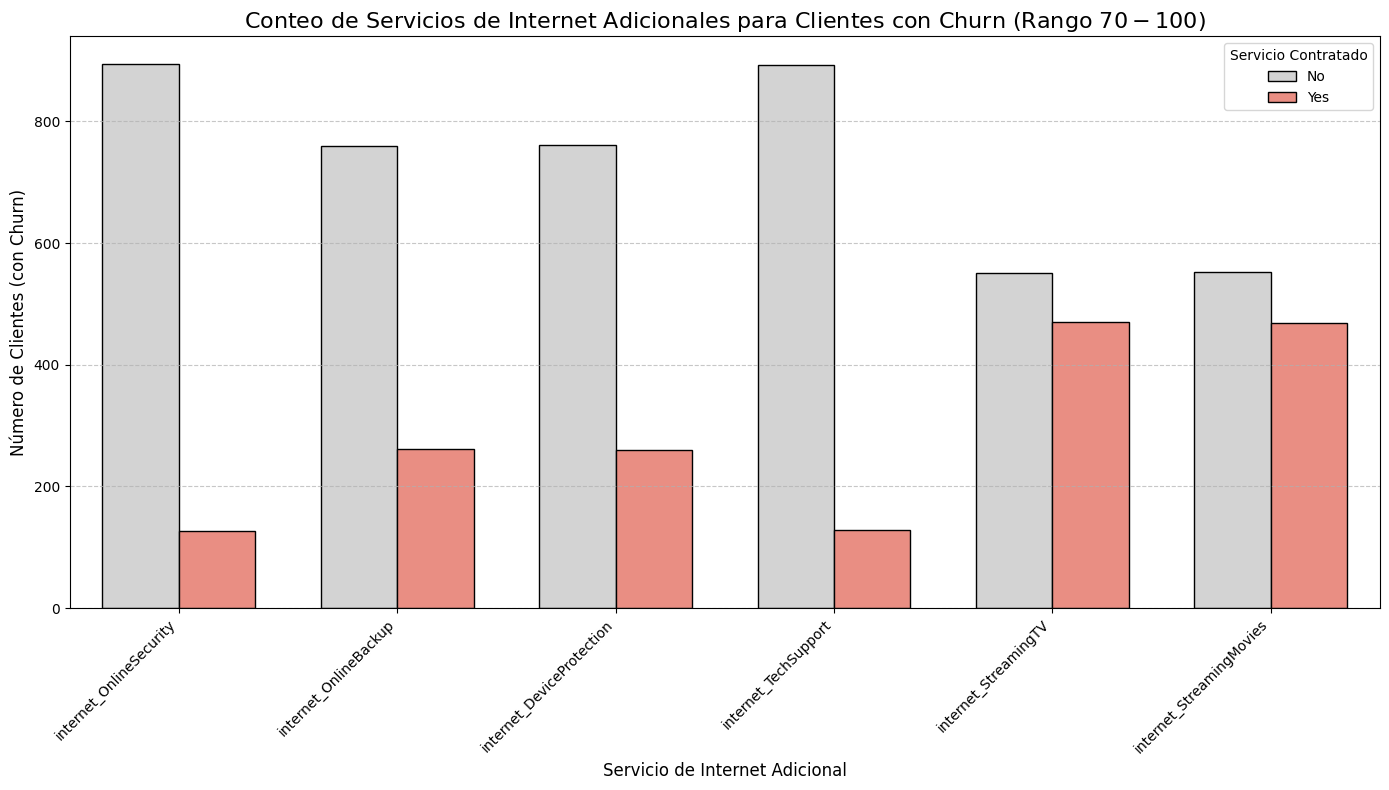

In [ ]:
# Caracterización clientes tramo 70-100, fibra óptica, según opciones

# Cargos mensuales entre $70 y $100
df_churn_segmento_70_100 = df_final[
    (df_final['Churn'] == 'Yes') &
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

print(f"Total de clientes Churn='Yes' en el tramo $70-$100: {len(df_churn_segmento_70_100)}")

# Columnas de servicios de internet adicionales a analizar
internet_service_cols = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# --- Contar los valores 'Yes' y 'No' para cada columna ---
print("\n--- Conteo de Servicios de Internet Adicionales para Clientes con Churn ('Yes') en el Rango $70-$100 ---")

# Diccionario para almacenar los conteos
service_counts = {}

for col in internet_service_cols:
    counts = df_churn_segmento_70_100[col].value_counts().to_dict()
    service_counts[col] = counts
    print(f"\n{col}:")
    print(counts)

# Convertir el diccionario de conteos a un DataFrame para facilitar la visualización
# Esto creará un DataFrame con las columnas de servicio como índice y 'Yes'/'No' como columnas
df_service_counts = pd.DataFrame.from_dict(service_counts, orient='index').fillna(0).astype(int)
df_service_counts.index.name = 'Servicio de Internet Adicional'

print("\n--- Resumen Consolidado de Conteos ---")
print(df_service_counts)

# --- Histograma (gráfico de barras para los conteos 'Yes'/'No') ---
# Para un histograma que muestre el conteo de 'Yes' y 'No' por cada servicio,
# lo más adecuado es un gráfico de barras agrupado o apilado.

# Preparar los datos para la visualización: derretir el DataFrame para usar hue
df_plot = df_service_counts.reset_index().melt(
    id_vars='Servicio de Internet Adicional',
    var_name='Estado del Servicio',
    value_name='Conteo de Clientes'
)

plt.figure(figsize=(14, 8)) # Ajusta el tamaño para una mejor visualización

sns.barplot(
    data=df_plot,
    x='Servicio de Internet Adicional',
    y='Conteo de Clientes',
    hue='Estado del Servicio', # Diferencia 'Yes' y 'No' por color
    palette={'Yes': 'salmon', 'No':  '#d3d3d3'},
 # Colores personalizados
    edgecolor='black', # Borde para cada barra
    width=0.7 # Ancho de las barras
)

plt.title('Conteo de Servicios de Internet Adicionales para Clientes con Churn (Rango $70-$100)', fontsize=16)
plt.xlabel('Servicio de Internet Adicional', fontsize=12)
plt.ylabel('Número de Clientes (con Churn)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Servicio Contratado')
plt.tight_layout()
plt.show()

In [ ]:
# Data Frame, de todos los clientes con Churn
df_churn_yes = df_final[df_final['Churn'] == 'Yes']
print(f"\nNúmero total de registros con Churn = 'Yes': {len(df_churn_yes)}")
df_churn_yes.head(2)



Número total de registros con Churn = 'Yes': 1869


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667


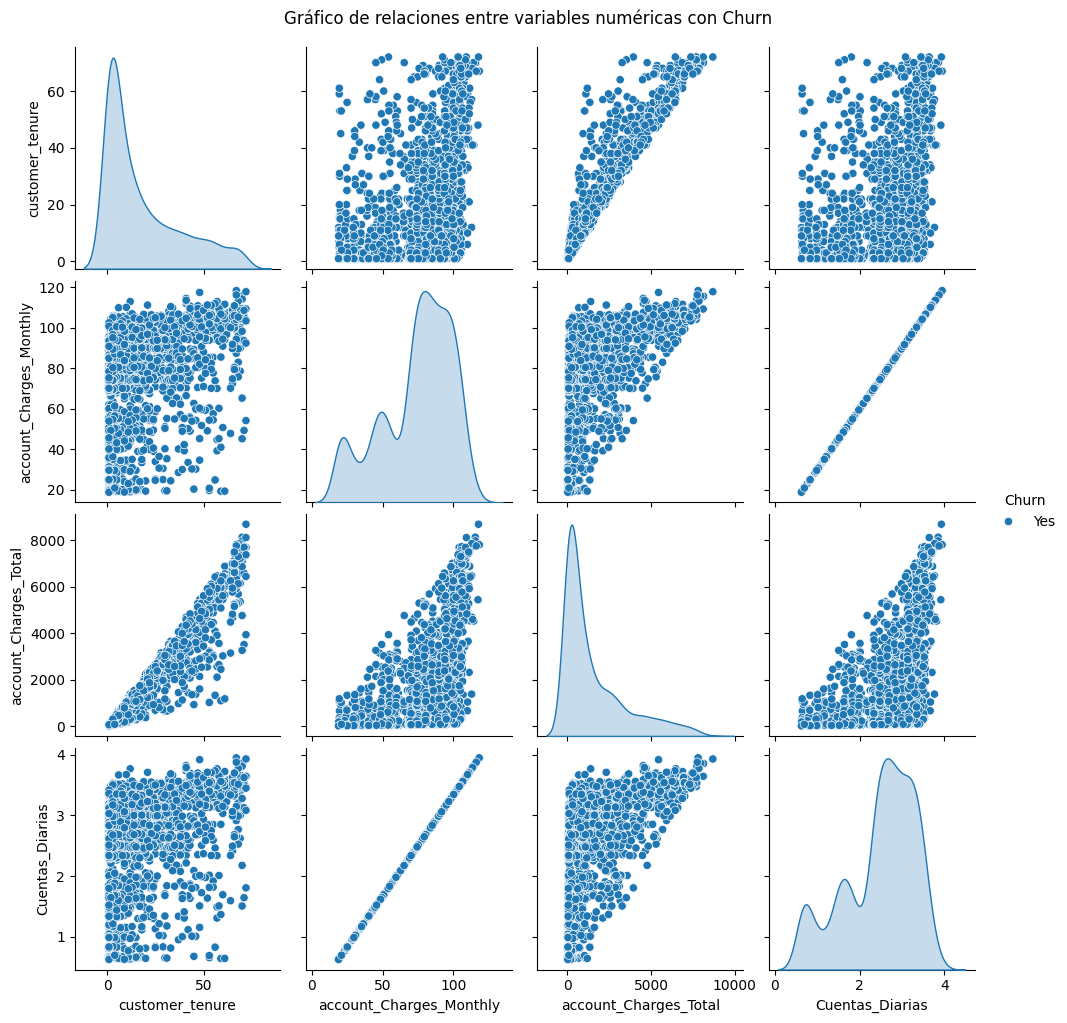

In [ ]:
# Ploteo variables numéricas:
# Variables numéricas para pairplot
variables_para_plot = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias' ]
sns.pairplot(df_churn_yes, vars=variables_para_plot, hue='Churn')
plt.suptitle('Gráfico de relaciones entre variables numéricas con Churn', y=1.02)
plt.show()

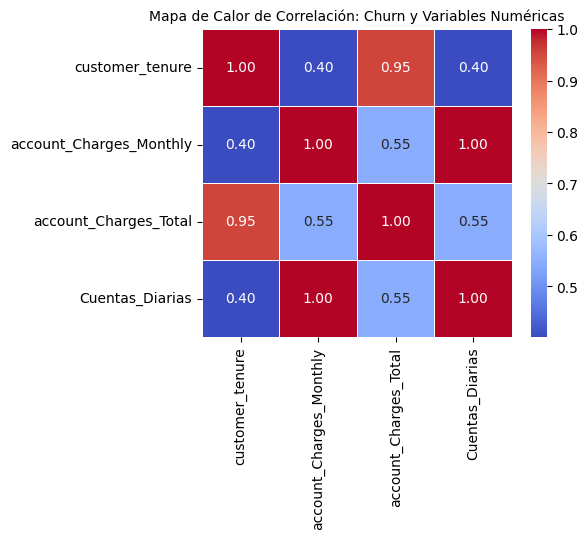

In [ ]:
# Columnas numéricas para el cálculo de correlación
columnas_numericas = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias'
]

# Calcular la matriz de correlación solo con las columnas numéricas
correlacion = df_churn_yes[columnas_numericas].corr()

# Visualizar el mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación: Churn y Variables Numéricas', fontsize=10)
plt.show()

Se aprecian correlaciones fuertes entre algunas variables, sin embargo hay que descartar una posible multicolinealidad, en el caso de implementar futuros modelos de predicción.

#📄Informe final

**Conclusiones del Análisis Descriptivo**

A través de un análisis descriptivo detallado, ha sido posible lograr la identificación de patrones significativos en el comportamiento de los clientes y su relación con el Churn.

Los hallazgos más relevantes son los siguientes:

 - Identificación de un segmento de riesgo clave: Un hallazgo destacado es que aproximadamente el 52,43% de los clientes que abandonan la empresa (Churn) se concentra en un rango de facturación mensual entre $70 - $100 USD. Este comportamiento se observa de manera específica en los clientes que han contratado el servicio de fibra óptica. Este segmento representa una clara área de enfoque para futuras acciones de retención.

 - Insuficiencia del análisis descriptivo: Aunque se han identificado estas relaciones, el análisis descriptivo presenta limitaciones para explorar la complejidad completa del problema. Con un total de 21 variables explicativas, la interacción de múltiples factores que influyen en el Churn de los clientes restantes es demasiado compleja para ser abordada únicamente con herramientas de visualización y análisis de una o dos variables.

 - Necesidad de un enfoque más avanzado: La incapacidad de este análisis para explicar el comportamiento del 50% restante de los clientes que abandonan la empresa, subraya la necesidad de un enfoque más robusto. Para desentrañar las relaciones multifactoriales y descubrir patrones ocultos, es fundamental avanzar hacia herramientas de Machine Learning.

En resumen, el análisis descriptivo ha proporcionado una comprensión básica y ha validado un segmento de clientes en riesgo, pero es insuficiente para una comprensión completa del problema. Por lo tanto, se concluye el análisis descriptivo y se propone continuar la investigación con modelos de Machine Learning, que permitirán identificar las variables explicativas más importantes y construir un modelo predictivo robusto para la retención de clientes.

In [ ]:
import sys
import platform

print("Versión de Python:", sys.version)
print("Versión de la plataforma:", platform.python_version())

Versión de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Versión de la plataforma: 3.11.13
